In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv('D:\Data Analysis & Python\Project Datasets\Competition data set\Fresh Findings Ltd Dataset.csv')

In [3]:
df.head()

,Year Born,EduFtion,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,2n Class,Together,"$7,500.00",1,0,NaN,98,5,17,17,13,14,34
1,1976,Graduation,Together,"$78,416.00",0,1,6/27/14,99,453,38,279,188,38,183
2,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
3,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
4,1974,Graduation,Single,"$69,719.00",0,0,5/26/14,99,273,86,208,177,14,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Born       2240 non-null   int64 
 1   EduFtion        2240 non-null   object
 2   Marital Status  2240 non-null   object
 3   Income          2216 non-null   object
 4   Kids            2240 non-null   int64 
 5   Teens           2240 non-null   int64 
 6   Date Enrolled   2239 non-null   object
 7   Recency         2240 non-null   int64 
 8   Wines           2240 non-null   int64 
 9   Fruits          2240 non-null   int64 
 10  Meat Products   2240 non-null   int64 
 11  Fish Products   2240 non-null   int64 
 12  Sweet Products  2240 non-null   int64 
 13  Gold Products   2240 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 245.1+ KB


## DATA CLEANING

In [5]:
df.rename(columns={'EduFtion':'Education'},inplace = True)
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,2n Class,Together,"$7,500.00",1,0,NaN,98,5,17,17,13,14,34
1,1976,Graduation,Together,"$78,416.00",0,1,6/27/14,99,453,38,279,188,38,183
2,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
3,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
4,1974,Graduation,Single,"$69,719.00",0,0,5/26/14,99,273,86,208,177,14,43


In [6]:
df['Education'].replace('2n Class','12 Class',inplace=True)
df['Marital Status'].replace({'Divorcd':'Divorced','Singl':'Single'},inplace=True)


In [7]:
df['Date Enrolled'] = pd.to_datetime(df['Date Enrolled'])
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,12 Class,Together,"$7,500.00",1,0,NaT,98,5,17,17,13,14,34
1,1976,Graduation,Together,"$78,416.00",0,1,2014-06-27,99,453,38,279,188,38,183
2,1966,Graduation,Married,"$44,794.00",0,1,2014-06-08,99,54,0,7,0,0,4
3,1966,Graduation,Married,"$44,794.00",0,1,2014-06-08,99,54,0,7,0,0,4
4,1974,Graduation,Single,"$69,719.00",0,0,2014-05-26,99,273,86,208,177,14,43


In [8]:
df['Income'] = df['Income'].str.replace('$','',regex=True)
df['Income'] = df['Income'].str.replace(',','',regex=True)
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,12 Class,Together,7500.00,1,0,NaT,98,5,17,17,13,14,34
1,1976,Graduation,Together,78416.00,0,1,2014-06-27,99,453,38,279,188,38,183
2,1966,Graduation,Married,44794.00,0,1,2014-06-08,99,54,0,7,0,0,4
3,1966,Graduation,Married,44794.00,0,1,2014-06-08,99,54,0,7,0,0,4
4,1974,Graduation,Single,69719.00,0,0,2014-05-26,99,273,86,208,177,14,43


In [9]:
df['Income'] = df['Income'].astype(float)
df['Income'].dtype

dtype('float64')

In [10]:
df.drop_duplicates(keep=False,inplace=True)
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,12 Class,Together,7500.0,1,0,NaT,98,5,17,17,13,14,34
1,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183
4,1974,Graduation,Single,69719.0,0,0,2014-05-26,99,273,86,208,177,14,43
5,1962,Graduation,Together,62568.0,0,1,2014-04-07,99,362,17,398,80,35,61
6,1969,Graduation,Married,42231.0,1,1,2014-03-25,99,24,0,8,0,1,4


In [11]:
df.isna().sum()

Year Born          0
Education          0
Marital Status     0
Income            24
Kids               0
Teens              0
Date Enrolled      1
Recency            0
Wines              0
Fruits             0
Meat Products      0
Fish Products      0
Sweet Products     0
Gold Products      0
dtype: int64

In [12]:
df.dropna(axis='index',how='any',subset=['Date Enrolled'],inplace=True)
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
1,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183
4,1974,Graduation,Single,69719.0,0,0,2014-05-26,99,273,86,208,177,14,43
5,1962,Graduation,Together,62568.0,0,1,2014-04-07,99,362,17,398,80,35,61
6,1969,Graduation,Married,42231.0,1,1,2014-03-25,99,24,0,8,0,1,4
11,1900,12 Class,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25


#### Statistical Summary

In [13]:
df.describe()

,Year Born,Income,Kids,Teens,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
count,1845.000000,1821.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,1968.726287,52502.002197,0.444986,0.509485,49.074255,302.763686,26.376694,168.505149,37.328455,27.360434,43.508401
std,11.978261,26040.831205,0.536956,0.549642,28.951909,335.021979,39.849767,230.306717,54.715092,42.168301,51.918837
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35765.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,2.000000,1.000000,9.000000
50%,1970.000000,51766.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000
75%,1977.000000,68657.000000,1.000000,1.000000,74.000000,503.000000,33.000000,224.000000,50.000000,34.000000,55.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,263.000000,362.000000


c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Density'>

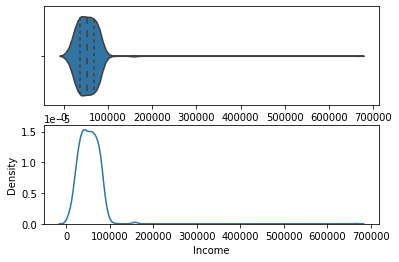

In [14]:
plt.subplot(211)
sns.violinplot(df['Income'],inner="quartile")

plt.subplot(212)
sns.kdeplot(df['Income'])

In [15]:
df['Income']=df['Income'].fillna(df['Income'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 1 to 2239
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year Born       1845 non-null   int64         
 1   Education       1845 non-null   object        
 2   Marital Status  1845 non-null   object        
 3   Income          1845 non-null   float64       
 4   Kids            1845 non-null   int64         
 5   Teens           1845 non-null   int64         
 6   Date Enrolled   1845 non-null   datetime64[ns]
 7   Recency         1845 non-null   int64         
 8   Wines           1845 non-null   int64         
 9   Fruits          1845 non-null   int64         
 10  Meat Products   1845 non-null   int64         
 11  Fish Products   1845 non-null   int64         
 12  Sweet Products  1845 non-null   int64         
 13  Gold Products   1845 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(10), object(2)
m

# Exploratory Data Analysis

In [16]:
df['Total sales'] = df['Wines']+df['Fruits']+df['Meat Products']+df['Fish Products']+df['Sweet Products']+df['Gold Products']
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,Total sales
1,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183,1179
4,1974,Graduation,Single,69719.0,0,0,2014-05-26,99,273,86,208,177,14,43,801
5,1962,Graduation,Together,62568.0,0,1,2014-04-07,99,362,17,398,80,35,61,953
6,1969,Graduation,Married,42231.0,1,1,2014-03-25,99,24,0,8,0,1,4,37
11,1900,12 Class,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,65


In [17]:
df['Age'] = 2021-df['Year Born']
df.head()

,Year Born,Education,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,Total sales,Age
1,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183,1179,45
4,1974,Graduation,Single,69719.0,0,0,2014-05-26,99,273,86,208,177,14,43,801,47
5,1962,Graduation,Together,62568.0,0,1,2014-04-07,99,362,17,398,80,35,61,953,59
6,1969,Graduation,Married,42231.0,1,1,2014-03-25,99,24,0,8,0,1,4,37,52
11,1900,12 Class,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,65,121


In [20]:
df['Income'].corr(df['Total sales'])

0.6328059712370238

### Correlation between the annual income and the amount of spending in the last 2 years 0.6328059712370238

<AxesSubplot:xlabel='Income', ylabel='Total sales'>

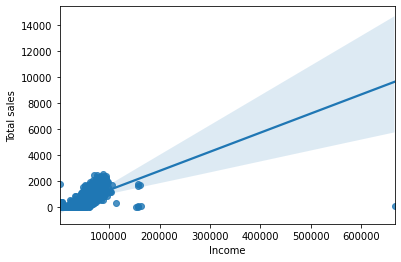

In [21]:
sns.regplot(x=df['Income'], y=df['Total sales'])